Counts of each class in y_train_label before SMOTE:
label
BENIGN    978989
ATTACK    147583
Name: count, dtype: int64

Counts of each class in y_train_category before SMOTE:
category
BENIGN      978989
SPOOFING     87853
DoS          59730
Name: count, dtype: int64

Counts of each class in y_train_specific_class before SMOTE:
specific_class
BENIGN            978989
DoS                59730
RPM                43920
SPEED              19960
STEERING_WHEEL     15981
GAS                 7992
Name: count, dtype: int64

Counts of each class in y_train_label after SMOTE:
label
BENIGN    978989
ATTACK    978989
Name: count, dtype: int64

Counts of each class in y_train_category after SMOTE:
category
BENIGN      978989
DoS         978989
SPOOFING    978989
Name: count, dtype: int64

Counts of each class in y_train_specific_class after SMOTE:
specific_class
BENIGN            978989
DoS               978989
SPEED             978989
STEERING_WHEEL    978989
GAS               978989
RPM            

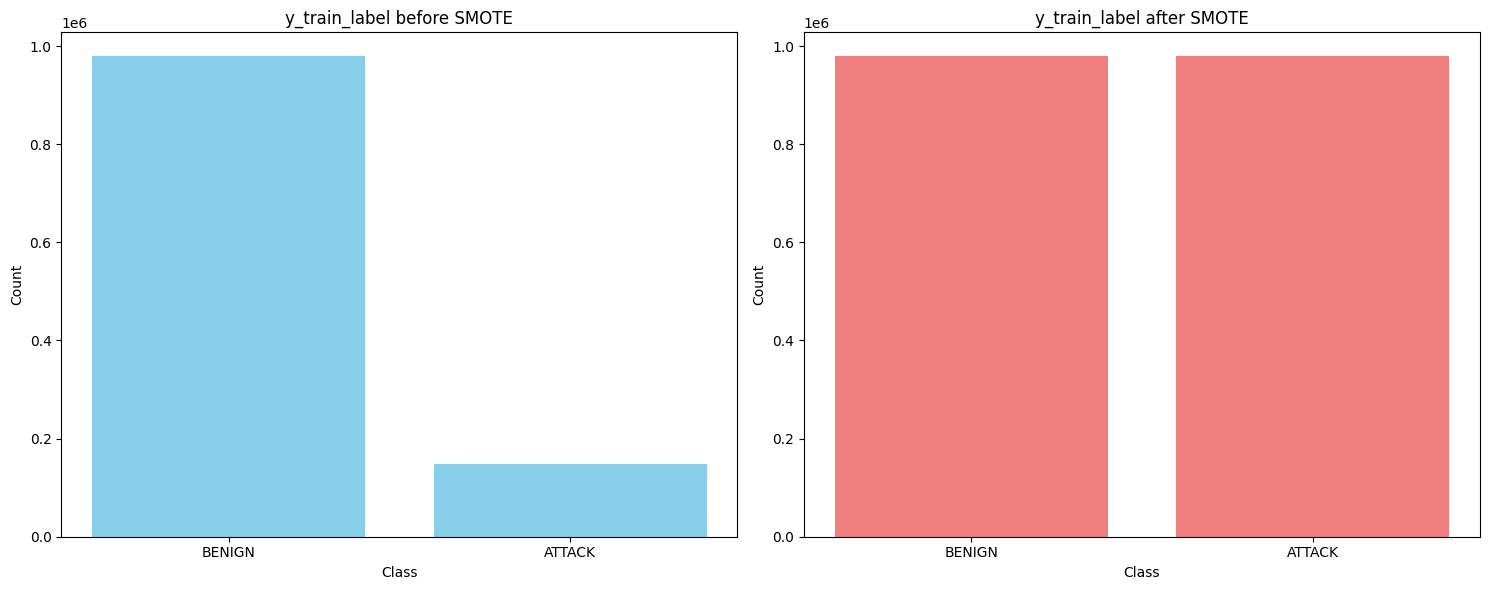

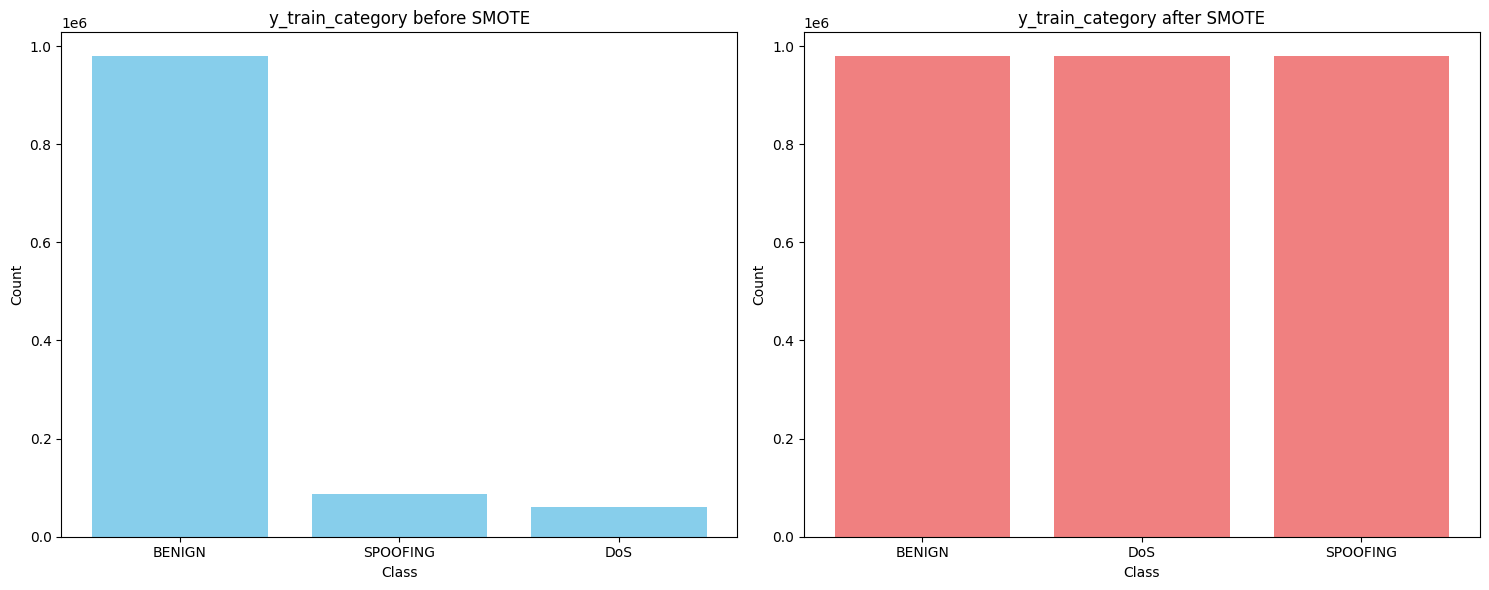

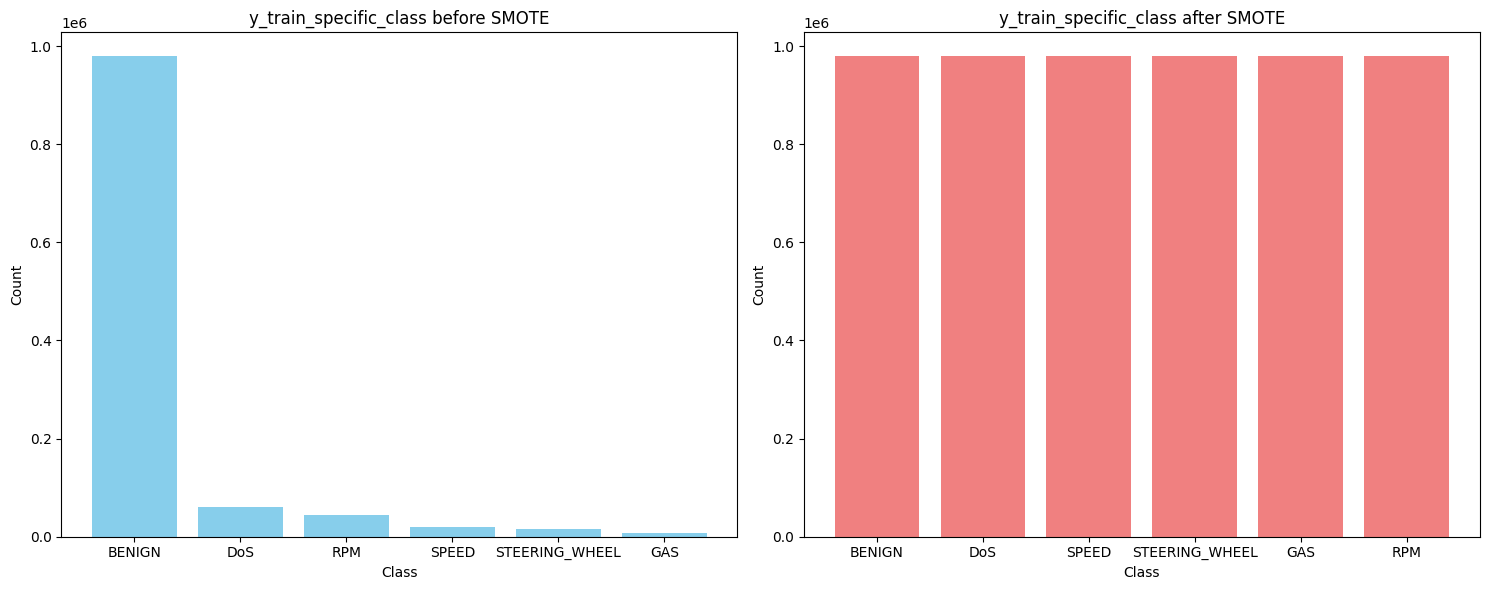

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

DECIMAL_DIRECTORY = '/Users/lamprinikourou/Documents/ThesisData/decimal/'

df_train_list = []
df_test_list = []
for csv_file in os.listdir(DECIMAL_DIRECTORY):
    d = pd.read_csv(DECIMAL_DIRECTORY + csv_file)
    df_train_list.append(d[:int(0.8 * len(d))])
    df_test_list.append(d[int(0.8 * len(d)):])
df_train = pd.concat(df_train_list).sample(frac=1).reset_index(drop=True)
df_test = pd.concat(df_test_list).sample(frac=1).reset_index(drop=True)
del df_train_list
del df_test_list

X_columns = [c for c in df_train.columns if c not in ['label', 'category', 'specific_class']]
y_column_label = 'label'
y_column_category = 'category'
y_column_specific_class = 'specific_class'

print("Counts of each class in y_train_label before SMOTE:")
print(df_train[y_column_label].value_counts())
print()
print("Counts of each class in y_train_category before SMOTE:")
print(df_train[y_column_category].value_counts())
print()
print("Counts of each class in y_train_specific_class before SMOTE:")
print(df_train[y_column_specific_class].value_counts())
print()

smote = SMOTE()

X_train_label, y_train_label = smote.fit_resample(df_train[X_columns], df_train[y_column_label])
X_train_category, y_train_category = smote.fit_resample(df_train[X_columns], df_train[y_column_category])
X_train_specific_class, y_train_specific_class = smote.fit_resample(df_train[X_columns], df_train[y_column_specific_class])

print("Counts of each class in y_train_label after SMOTE:")
print(pd.Series(y_train_label).value_counts())
print()
print("Counts of each class in y_train_category after SMOTE:")
print(pd.Series(y_train_category).value_counts())
print()
print("Counts of each class in y_train_specific_class after SMOTE:")
print(pd.Series(y_train_specific_class).value_counts())
print()

OUTPUT_DIRECTORY = '/Users/lamprinikourou/Documents/'

def plot_save_and_show(title, before_counts, after_counts, filename):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    axes[0].bar(before_counts.index, before_counts.values, color='skyblue')
    axes[0].set_title(f'{title} before SMOTE')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')

    axes[1].bar(after_counts.index, after_counts.values, color='lightcoral')
    axes[1].set_title(f'{title} after SMOTE')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIRECTORY, filename))
    plt.show()
    plt.close()

plot_save_and_show('y_train_label', df_train[y_column_label].value_counts(), pd.Series(y_train_label).value_counts(), 'y_train_label_comparison.png')

plot_save_and_show('y_train_category', df_train[y_column_category].value_counts(), pd.Series(y_train_category).value_counts(), 'y_train_category_comparison.png')

plot_save_and_show('y_train_specific_class', df_train[y_column_specific_class].value_counts(), pd.Series(y_train_specific_class).value_counts(), 'y_train_specific_class_comparison.png')
